In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


In [63]:
tracks = pd.read_csv('tracks_cleaned.csv', index_col='track_id')
print(tracks.head())

          acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.416675      0.675894  0.634476          0.010628  0.177647   
3             0.374408      0.528643  0.817461          0.001851  0.105880   
5             0.043567      0.745566  0.701470          0.000697  0.373143   
10            0.951670      0.658179  0.924525          0.965427  0.115474   
134           0.452217      0.513238  0.560410          0.019443  0.096567   

          speechiness    tempo   valence  year_released                 album  \
track_id                                                                        
2            0.159310  165.922  0.576661           2009  AWOL - A Way Of Life   
3            0.461818  126.957  0.269240           2009  AWOL - A Way Of Life   
5            0.124595  100.260  0.621661           2009  AWOL - A Way Of Life   
10           0.032985  111.562  0.963590        

In [64]:
audio_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
features = tracks[audio_cols]
print(features.head())


          acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.416675      0.675894  0.634476          0.010628  0.177647   
3             0.374408      0.528643  0.817461          0.001851  0.105880   
5             0.043567      0.745566  0.701470          0.000697  0.373143   
10            0.951670      0.658179  0.924525          0.965427  0.115474   
134           0.452217      0.513238  0.560410          0.019443  0.096567   

          speechiness    tempo   valence  
track_id                                  
2            0.159310  165.922  0.576661  
3            0.461818  126.957  0.269240  
5            0.124595  100.260  0.621661  
10           0.032985  111.562  0.963590  
134          0.525519  114.290  0.894072  


In [65]:
var=[]
mean=[]
std=[]
for column in audio_cols:
    var.append(np.var(features[column]))
    mean.append(np.mean(features[column]))
    std.append(np.std(features[column]))
d={'variance':var,'mean':mean,'std':std}
info=pd.DataFrame(d)
print(info)

      variance        mean        std
0     0.147229    0.524688   0.383704
1     0.036154    0.487290   0.190141
2     0.077305    0.537516   0.278038
3     0.130622    0.640536   0.361416
4     0.024978    0.187804   0.158045
5     0.018872    0.099174   0.137375
6  1225.966466  123.080061  35.013804
7     0.076186    0.439761   0.276018


In [66]:
# we need to normalize tempo component as it has high variance as compared to other components
min_tempo=np.min(tracks.tempo)
max_tempo=np.max(tracks.tempo)
tracks.tempo = (tracks.tempo-min_tempo)/(max_tempo-min_tempo)

In [67]:
print("data after normalization")
print(tracks.head())
features = tracks[audio_cols]
var=[]
mean=[]
std=[]
for column in audio_cols:
    var.append(np.var(features[column]))
    mean.append(np.mean(features[column]))
    std.append(np.std(features[column]))
d={'variance':var,'mean':mean,'std':std}
info=pd.DataFrame(d)
print(info)

data after normalization
          acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.416675      0.675894  0.634476          0.010628  0.177647   
3             0.374408      0.528643  0.817461          0.001851  0.105880   
5             0.043567      0.745566  0.701470          0.000697  0.373143   
10            0.951670      0.658179  0.924525          0.965427  0.115474   
134           0.452217      0.513238  0.560410          0.019443  0.096567   

          speechiness     tempo   valence  year_released  \
track_id                                                   
2            0.159310  0.642706  0.576661           2009   
3            0.461818  0.479206  0.269240           2009   
5            0.124595  0.367184  0.621661           2009   
10           0.032985  0.414608  0.963590           2008   
134          0.525519  0.426055  0.894072           2009   

       

Text(0, 0.5, 'Sum of squared distances within')

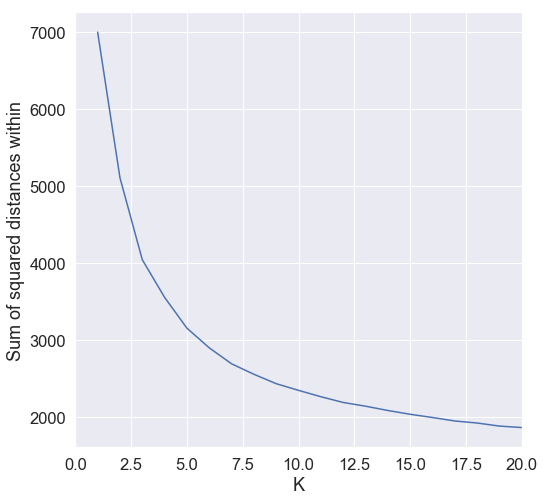

In [68]:
# Finding best K to apply K-mean algoritham
# We are using two methods to find out best K for K-mean method, one where we are finding out 
# within sum of squared distance to, the lower the sum of squared distance the better the clusters are,
# But if we choose number of cluster for very small sum of squared distance within, it might lead to over fitting
# So we are also using Silhoutee method to find K value for K mean method
# It find the distance within cluster and the cluster closet to it find the difference between them
# To normalize it divide the difference by max(a,b)(a- distance within cluster, b- distance to the closest cluster)
# the value lies with in -1 to 1 closer the value to 1 the clustering is better

matrix = features.as_matrix()
# =============================================================================
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)
     
plt.figure(figsize=(8,8))
plt.plot(K,Sum_of_squared_distances)
plt.xlim(0,20)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Sum of squared distances within')

Text(0.5, 0, 'K')

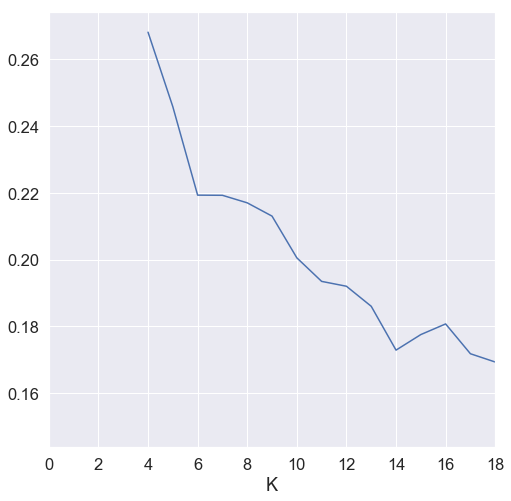

In [69]:
# Silhoutee score
# =============================================================================
Ks = np.arange(2, 30)
kms = [KMeans(n_clusters=i, random_state=1986).fit(matrix) for i in Ks]
s_scores = [silhouette_score(matrix,kms[i].labels_) for i in range(2,len(Ks))]
plt.figure(figsize=(8,8))
plt.plot(Ks[2:len(Ks)],s_scores)
plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')


In [70]:
#kmean
# =============================================================================
km = KMeans(n_clusters = 9, n_init=10)
km.fit(matrix)
labels = km.labels_
cluster_centers = km.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
km_clusters = pd.DataFrame(cluster_centers, columns=audio_cols)
km_clusters['cluster'] = ['KM{}'.format(l) for l in labels_unique]
print(km_clusters.head())
km_clusters.shape


   acousticness  danceability    energy  instrumentalness  liveness  \
0      0.176492      0.535352  0.407588          0.835682  0.159664   
1      0.921219      0.380316  0.191877          0.881577  0.182731   
2      0.849107      0.546921  0.517101          0.863232  0.184148   
3      0.095258      0.390183  0.829725          0.817991  0.205675   
4      0.744465      0.593873  0.512701          0.082596  0.203551   

   speechiness     tempo   valence cluster  
0     0.084190  0.447263  0.241592     KM0  
1     0.059448  0.403401  0.212137     KM1  
2     0.091324  0.483610  0.730273     KM2  
3     0.084064  0.506120  0.282632     KM3  
4     0.249687  0.477860  0.691297     KM4  


(9, 9)

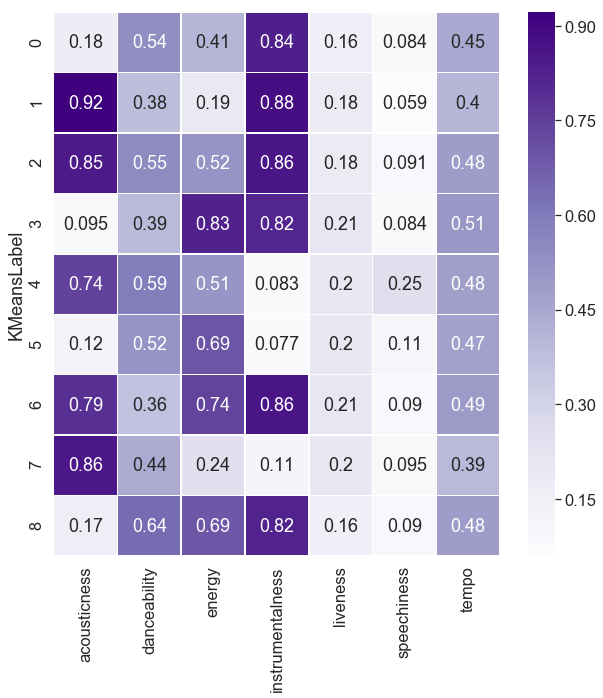

In [71]:
#heat Map
# =============================================================================
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.heatmap(km_clusters.iloc[:,0:7], linewidth=0.5,cmap='Purples',
    annot=True)
plt.ylabel("KMeansLabel")
plt.show()

KM0: Highly instrumental and danceable. "Upbeat danceable songs"

KM1: Highly acoustic, instrumental, and with low valence. "satanic songs"

KM2: Moderately danceable, energitic, and with moderate valence. "Uplifting calm songs"
    
KM3: Highly danceable, energitic, instrumental, and with high valence. "Lively empowering songs"  
    
KM4: Highly acoustic with high valence and moderate speechiness. "Pleasant relaxing songs" 
    
KM5: Highly energitic, instrumental, and moderate tempo. "Druggie songs"
    
KM6: Highly acoustic, instrumental, and with high valence. "Enlighting happy songs"
    
KM7: Highly acoustic with low valence. "Dull sad songs" 
    
KM8: Highly acoustic, energitic, instrumental with high tempo. "exciting fast songs"

In [72]:
descriptive_labels = ["Upbeat danceable songs", "satanic songs", "Uplifting calm songs", 
                     "Lively empowering songs", "Pleasant relaxing songs", "Druggie songs",
                     "Enlighting happy songs", "Dull sad songs", "exciting fast songs"]
unique_labels = np.unique(labels)
translated_labels = dict(zip(unique_labels, descriptive_labels))
tracks['KMeansLabel'] = list(map(lambda x:translated_labels[x], labels))

In [73]:
# PCA is an excresice of maximizing variance, which project data onto a direction with high variance
# If we perform pca without normalizing we biased towards data with higher measureent unit and high variance 
# however there might be other features which has actual contribution in overall picture but since it's unit is small,
# pca is ignoring it
# applying principal components

In [74]:
#Projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(matrix)
components = pca.components_
explained_variance = pca.explained_variance_
singular_values = pca.singular_values_
tracks["pc1"] = principalComponents[:,0]
tracks["pc2"] = principalComponents[:,1]
print(singular_values)


[49.23494313 41.38089028]


Text(0.5, 1.0, 'Clustering by Genre, Reduced Dimension')

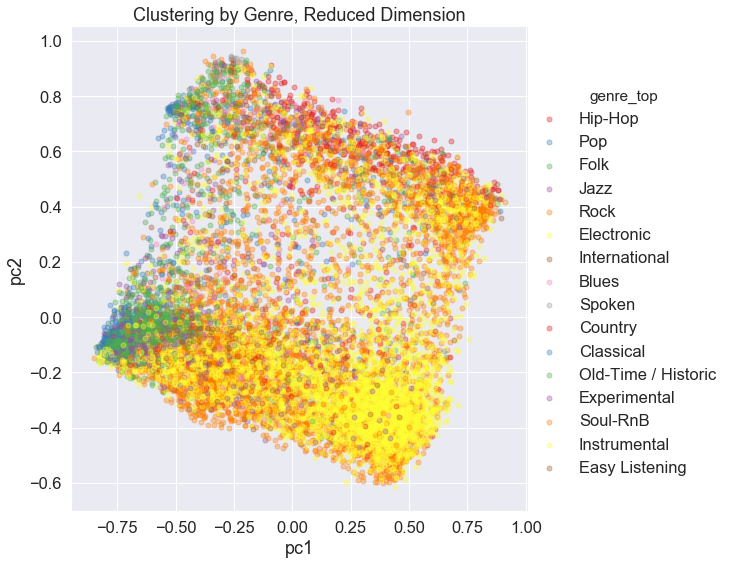

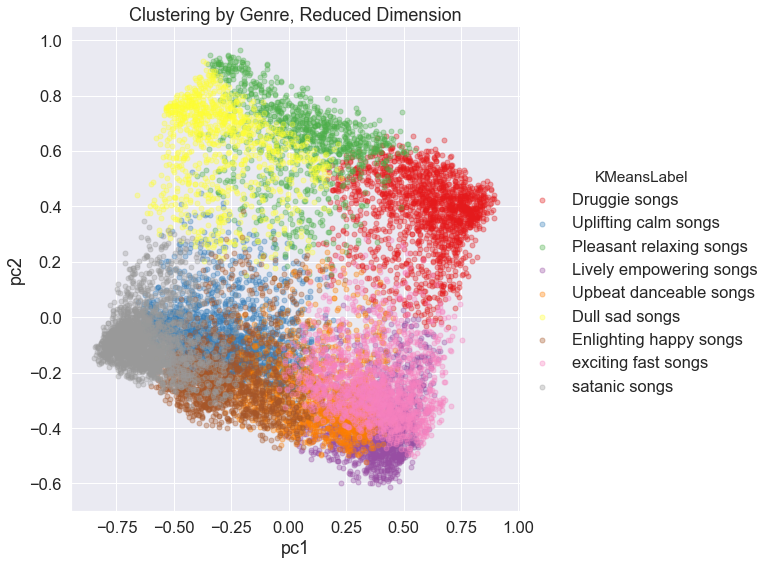

In [75]:
sns.set(font_scale=1.5)
sns.lmplot(data=tracks, x='pc1', y='pc2', hue='genre_top', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
plt.savefig('pca_scatter_genres.png')
plt.title("Clustering by Genre, Reduced Dimension")

tracks['label'] = labels
sns.lmplot(data=tracks, x='pc1', y='pc2', hue='KMeansLabel', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
plt.savefig('pca_cluster_scatter_genres.png')
plt.title("Clustering by Genre, Reduced Dimension")

In [76]:
### Obtaining only electronic tracks

elec = pd.read_csv('tracks_cleaned.csv', index_col=0)
elec.drop(['year_released', 'duration', 'artist_id', 'album_id'], axis=1, inplace=True)
elec.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album,artist,genres_all_id,track,genre_top,genres_all
track_id,,,,,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,AWOL - A Way Of Life,AWOL,[21],Food,Hip-Hop,['Hip-Hop']
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,AWOL - A Way Of Life,AWOL,[21],Electric Ave,Hip-Hop,['Hip-Hop']
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,AWOL - A Way Of Life,AWOL,[21],This World,Hip-Hop,['Hip-Hop']
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,Constant Hitmaker,Kurt Vile,[10],Freeway,Pop,['Pop']
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,AWOL - A Way Of Life,AWOL,[21],Street Music,Hip-Hop,['Hip-Hop']


In [77]:
elec_tracks = elec.loc[elec['genre_top'] == 'Electronic']
elec_tracks.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album,artist,genres_all_id,track,genre_top,genres_all
track_id,,,,,,,,,,,,,,
236,0.230013,0.848918,0.444921,0.820067,0.162606,0.101744,120.095,0.846313,Bersa Discos #8,Banana Clipz,"[2, 92, 15]","Push Am (Left, Right)",Electronic,"['International', 'African', 'Electronic']"
384,0.444822,0.561166,0.700912,0.817286,0.111111,0.036441,91.077,0.344763,Summer Set,Blanketship,[15],Baja Jones,Electronic,['Electronic']
386,0.436375,0.585549,0.782927,0.894428,0.142187,0.047893,130.464,0.301543,Summer Set,Blanketship,[15],Clapartroach,Electronic,['Electronic']
387,0.464508,0.493599,0.552749,0.736318,0.110117,0.055116,136.255,0.221480,Summer Set,Blanketship,[15],I wish I wish,Electronic,['Electronic']
396,0.844582,0.144217,0.627557,0.868801,0.386048,0.091710,94.035,0.031676,On the Back of a Dying Beast: Volume 1,Borful Tang,[15],Juggernaut Soliloquy,Electronic,['Electronic']


In [78]:
elec_tracks.drop(['album', 'artist', 'genres_all_id', 'track','genres_all'], axis=1, inplace=True)

In [79]:
elec_tracks.head(10)
elec_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 236 to 124911
Data columns (total 9 columns):
acousticness        3800 non-null float64
danceability        3800 non-null float64
energy              3800 non-null float64
instrumentalness    3800 non-null float64
liveness            3800 non-null float64
speechiness         3800 non-null float64
tempo               3800 non-null float64
valence             3800 non-null float64
genre_top           3800 non-null object
dtypes: float64(8), object(1)
memory usage: 296.9+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E92879240>,
      dtype=object)

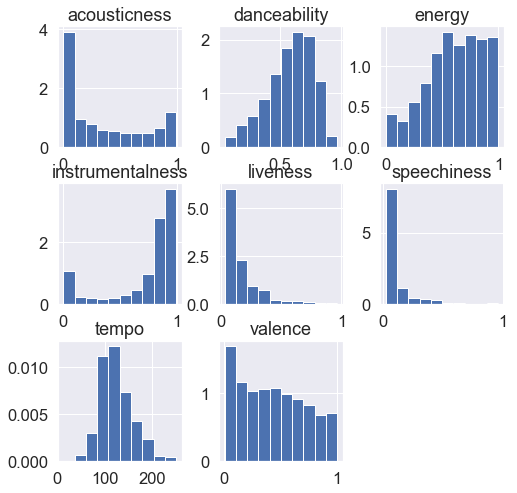

In [80]:
elec_tracks[audio_cols].hist(figsize=(8,8), normed=True)

In [81]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
tempo = elec_tracks['tempo'].values.reshape(-1,1)
elec_tracks['tempo'] = MinMaxScaler().fit_transform(tempo)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E91B969E8>,
      dtype=object)

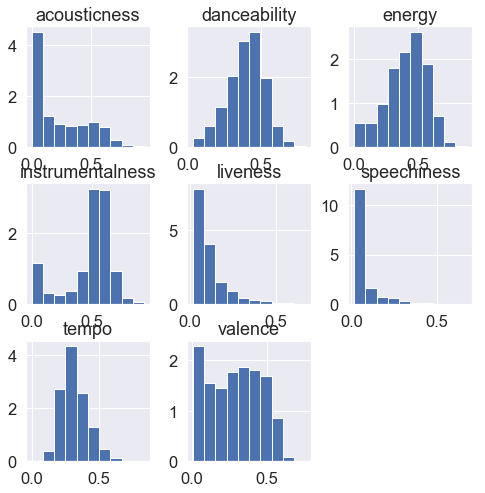

In [82]:
norm = Normalizer()
elec_tracks[audio_cols] = norm.fit_transform(elec_tracks[audio_cols])

elec_tracks[audio_cols].hist(figsize=(8,8), normed=True)

In [83]:
matrix2 = elec_tracks[audio_cols].as_matrix()

Text(0, 0.5, 'Sum of squared distances within')

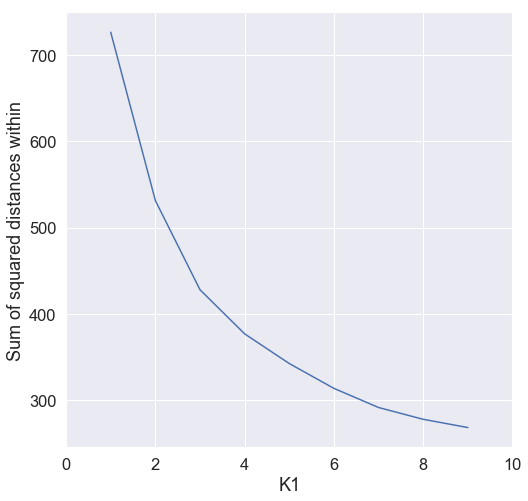

In [84]:
Sum_of_squared_distances = []
K1 = range(1,10)
for k1 in K1:
    km1 = KMeans(n_clusters=k1)
    km1 = km1.fit(matrix2)
    Sum_of_squared_distances.append(km1.inertia_)
     
plt.figure(figsize=(8,8))
plt.plot(K1,Sum_of_squared_distances)
plt.xlim(0,10)
plt.grid(True)
plt.xlabel('K1')
plt.ylabel('Sum of squared distances within')

Text(0.5, 0, 'K1')

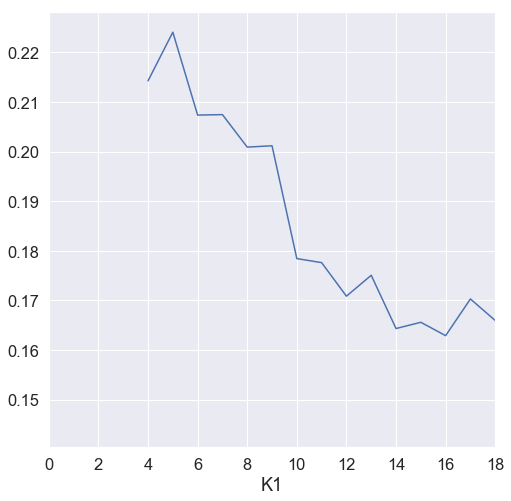

In [85]:
Ks1 = np.arange(2, 30)
kms1 = [KMeans(n_clusters=i, random_state=1986).fit(matrix2) for i in Ks1]
s_scores = [silhouette_score(matrix2,kms1[i].labels_) for i in range(2,len(Ks1))]
plt.figure(figsize=(8,8))
plt.plot(Ks1[2:len(Ks1)],s_scores)
plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K1')

In [86]:
km1 = KMeans(n_clusters = 6, n_init=10)
km1.fit(matrix2)
labels1 = km1.labels_
cluster_centers1 = km1.cluster_centers_
labels1_unique = np.unique(labels1)
n_clusters_ = len(labels1_unique)
km1_clusters = pd.DataFrame(cluster_centers1, columns=audio_cols)
km1_clusters['cluster1'] = ['EL{}'.format(l) for l in labels1_unique]
print(km1_clusters.head())
km1_clusters.shape

   acousticness  danceability    energy  instrumentalness  liveness  \
0      0.066967      0.427437  0.437829          0.523982  0.100757   
1      0.580203      0.403756  0.321245          0.077653  0.146127   
2      0.567003      0.270391  0.224741          0.596778  0.116169   
3      0.406650      0.392715  0.368993          0.512970  0.086461   
4      0.114153      0.486203  0.557982          0.084904  0.151001   

   speechiness     tempo   valence cluster1  
0     0.064610  0.303694  0.428286      EL0  
1     0.155764  0.326847  0.281618      EL1  
2     0.062165  0.293087  0.100022      EL2  
3     0.066069  0.278978  0.359113      EL3  
4     0.093991  0.376296  0.382834      EL4  


(6, 9)

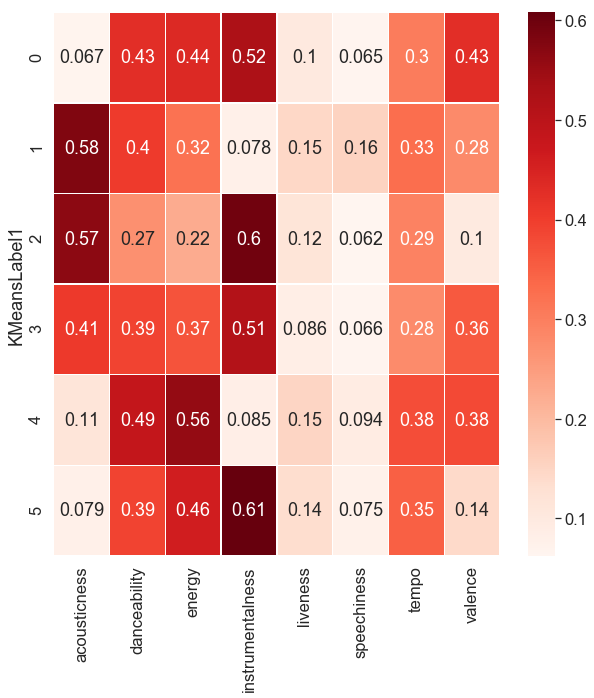

In [87]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.heatmap(km1_clusters.iloc[:,0:8], linewidth=0.5,cmap='Reds', annot=True)
plt.ylabel("KMeansLabel1")
plt.show()

EL0: Highly instrumental, danceable and energetic. "Upbeat danceable electronic"

EL1: Highly energetic and instrumental with low valence. "Upbeat sad electronic"

EL2: Highly acoustic, instrumental and low valence. "Satanic Songs"
    
EL3: Highly danceable, energetic, instrumental, and with high valence. "Lively empowering electronics"  
    
EL4: Highly acoustic, danceable with moderate energy and valence. "Pleasant electronics" 
    
EL5: Highly energitic, danceable with moderate tempo and valence. "Pleasant danceable electronics"

In [88]:
tracks.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,year_released,album,...,artist,genres_all_id,track,duration,genre_top,genres_all,KMeansLabel,pc1,pc2,label
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,0.642706,0.576661,2009,AWOL - A Way Of Life,...,AWOL,[21],Food,168,Hip-Hop,['Hip-Hop'],Druggie songs,0.387287,0.556683,5
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,0.479206,0.269240,2009,AWOL - A Way Of Life,...,AWOL,[21],Electric Ave,237,Hip-Hop,['Hip-Hop'],Druggie songs,0.416157,0.487203,5
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,0.367184,0.621661,2009,AWOL - A Way Of Life,...,AWOL,[21],This World,206,Hip-Hop,['Hip-Hop'],Druggie songs,0.722935,0.470858,5
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,0.414608,0.963590,2008,Constant Hitmaker,...,Kurt Vile,[10],Freeway,161,Pop,['Pop'],Uplifting calm songs,-0.155761,-0.169109,2
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,0.426055,0.894072,2009,AWOL - A Way Of Life,...,AWOL,[21],Street Music,207,Hip-Hop,['Hip-Hop'],Pleasant relaxing songs,0.362432,0.657398,4


In [89]:
descriptive_labels1 = ["Upbeat danceable electronics", "Upbeat sad electronics", "Satanic Songs", 
                     "Lively empowering electronics", "Pleasant electronics", "Pleasant danceable electronics"]
unique_labels1 = np.unique(labels1)
translated_labels1 = dict(zip(unique_labels1, descriptive_labels1))
elec_tracks['KM1'] = list(map(lambda x:translated_labels1[x], labels1))

In [90]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(matrix2)
components = pca.components_
explained_variance = pca.explained_variance_
singular_values = pca.singular_values_
elec_tracks["pc1"] = principalComponents[:,0]
elec_tracks["pc2"] = principalComponents[:,1]
print(singular_values)

[16.07881216 13.85292574]


Text(0.5, 1.0, 'Clustering by Genre, Reduced Dimension')

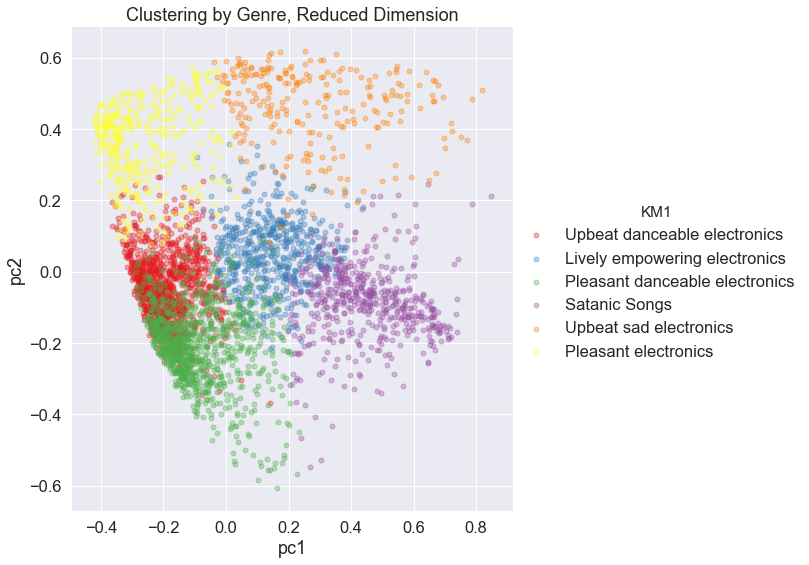

In [91]:
elec_tracks['label1'] = labels1
sns.lmplot(data=elec_tracks, x='pc1', y='pc2', hue='KM1', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
plt.savefig('pca_cluster_scatter_genres.png')
plt.title("Clustering by Genre, Reduced Dimension")

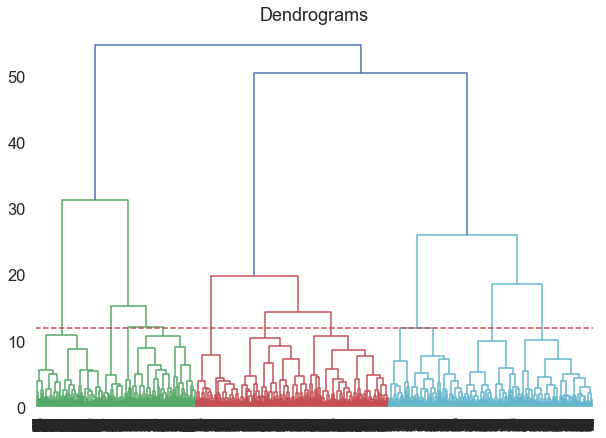

In [92]:
#creating dendrograms for hierarchical clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features, method='ward'))

#creating threshold line to determine optimal clusters
plt.axhline(y=12, color='r', linestyle='--')

In [93]:
#implementing agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
cluster.fit_predict(features)

array([3, 3, 3, ..., 2, 0, 4], dtype=int64)

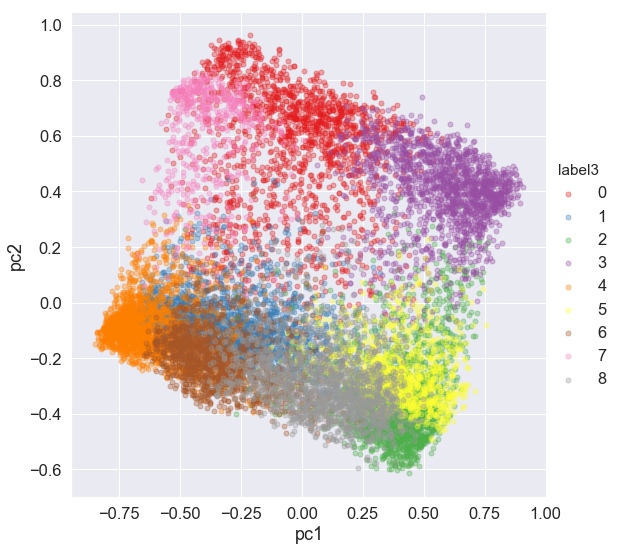

In [94]:
#visualising hierarchical clustering

labels3 = cluster.labels_
tracks['label3'] = labels3
sns.lmplot(data=tracks, x='pc1', y='pc2' , hue='label3', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

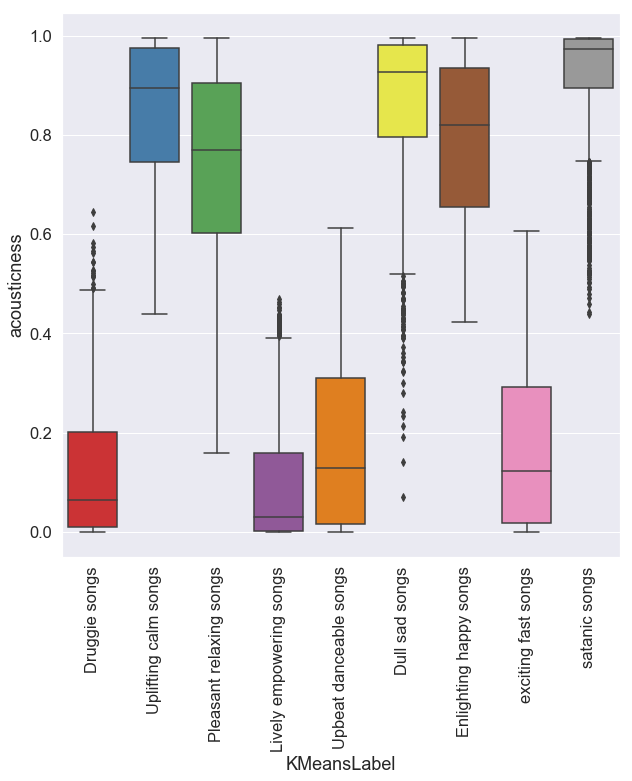

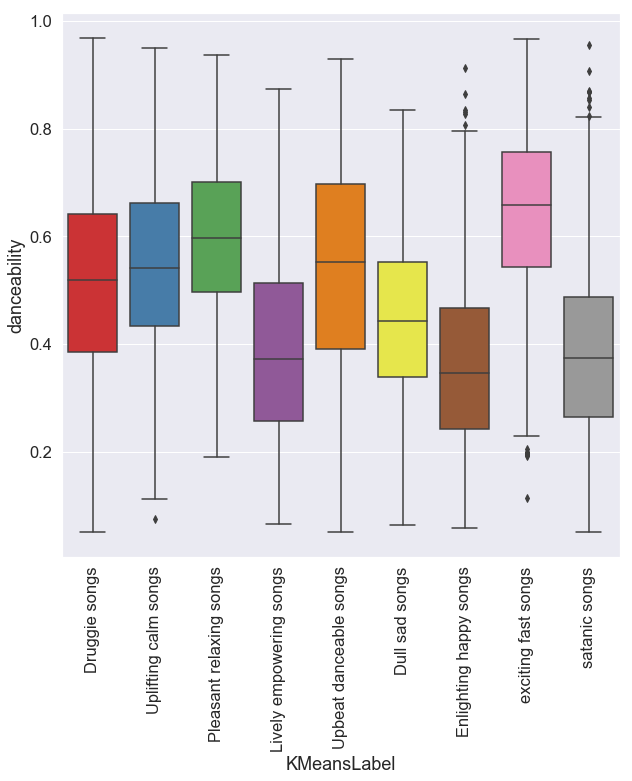

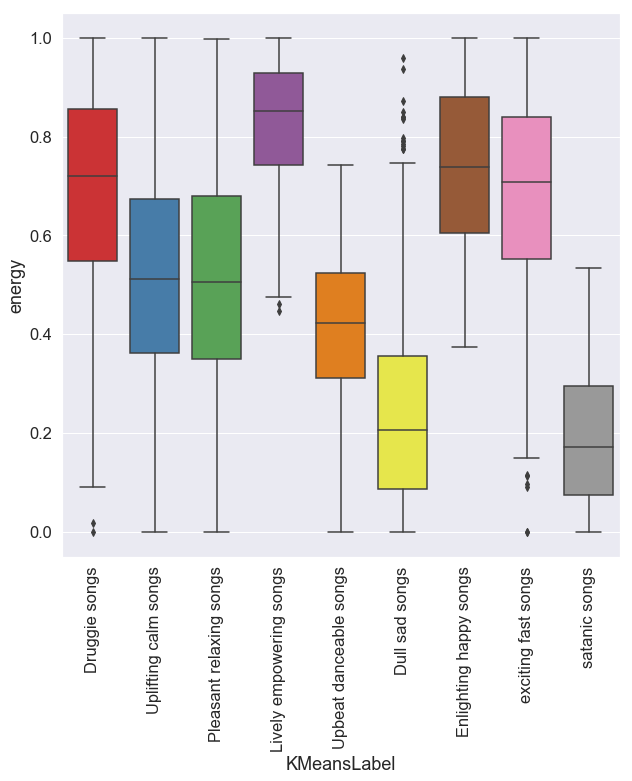

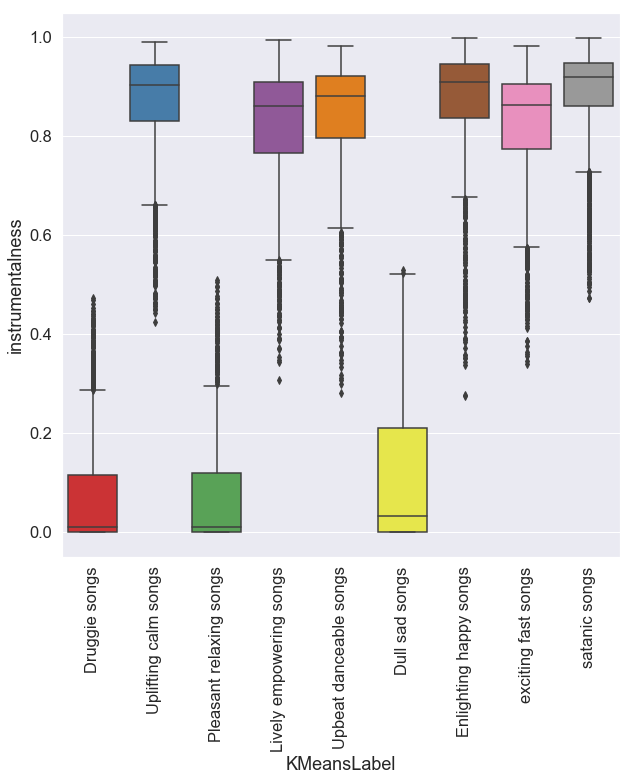

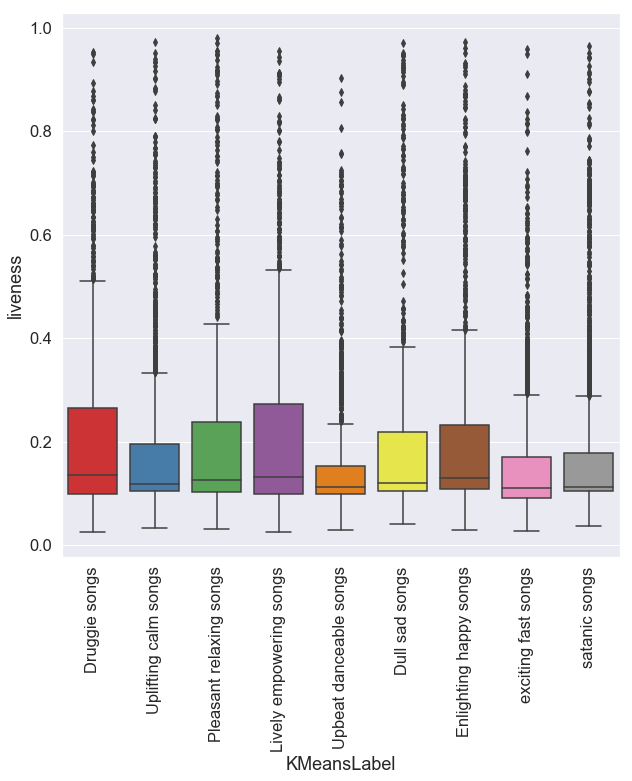

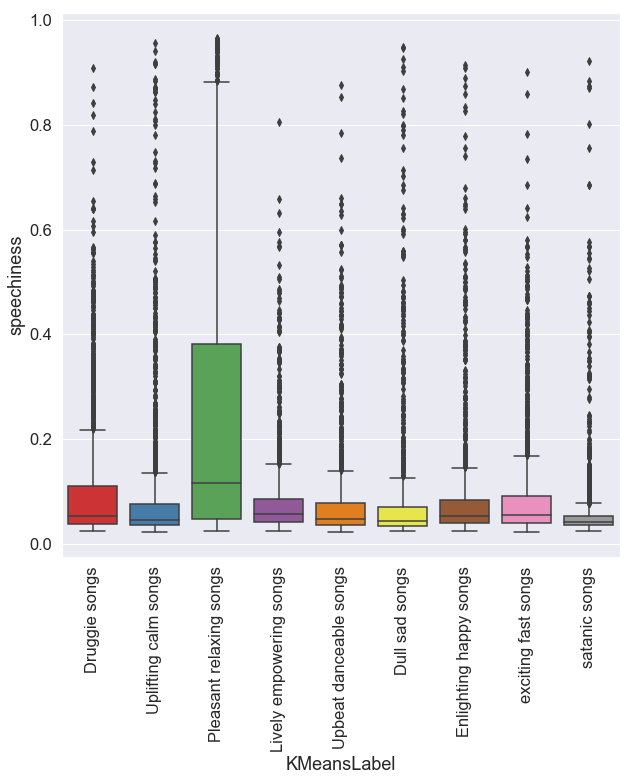

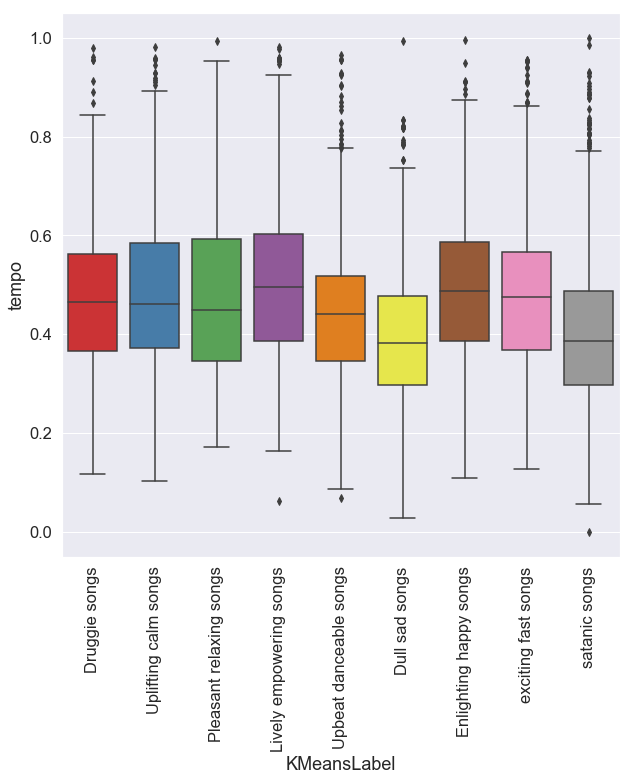

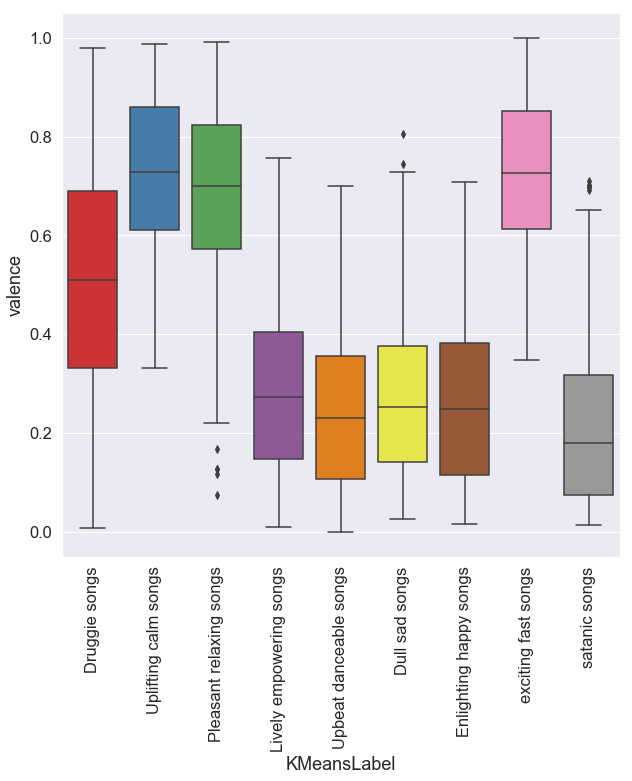

In [95]:
#boxplots for K-Means clustering

plt.figure(figsize=(10,10))
sns.boxplot(x='KMeansLabel', y='acousticness', data=tracks, palette='Set1')
plt.xticks(rotation=90)

plt.figure(figsize=(10,10))
sns.boxplot(x='KMeansLabel', y='danceability', data=tracks, palette='Set1')
plt.xticks(rotation=90)

plt.figure(figsize=(10,10))
sns.boxplot(x='KMeansLabel', y='energy', data=tracks, palette='Set1')
plt.xticks(rotation=90)

plt.figure(figsize=(10,10))
sns.boxplot(x='KMeansLabel', y='instrumentalness', data=tracks, palette='Set1')
plt.xticks(rotation=90)

plt.figure(figsize=(10,10))
sns.boxplot(x='KMeansLabel', y='liveness', data=tracks, palette='Set1')
plt.xticks(rotation=90)

plt.figure(figsize=(10,10))
sns.boxplot(x='KMeansLabel', y='speechiness', data=tracks, palette='Set1')
plt.xticks(rotation=90)

plt.figure(figsize=(10,10))
sns.boxplot(x='KMeansLabel', y='tempo', data=tracks, palette='Set1')
plt.xticks(rotation=90)

plt.figure(figsize=(10,10))
sns.boxplot(x='KMeansLabel', y='valence', data=tracks, palette='Set1')
plt.xticks(rotation=90)

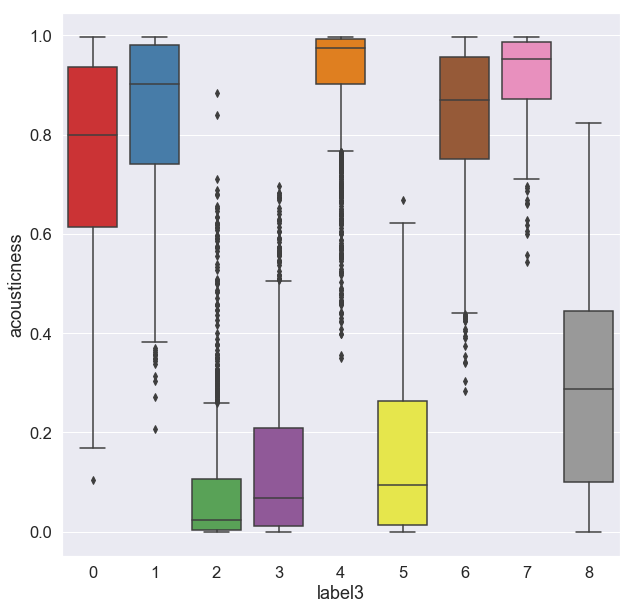

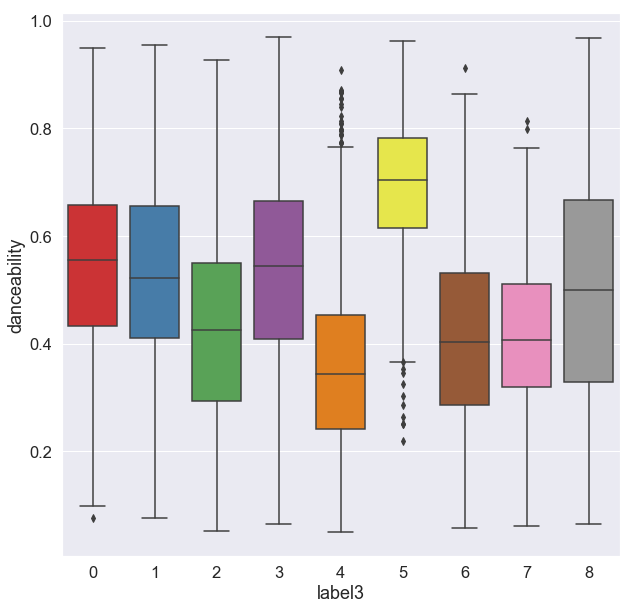

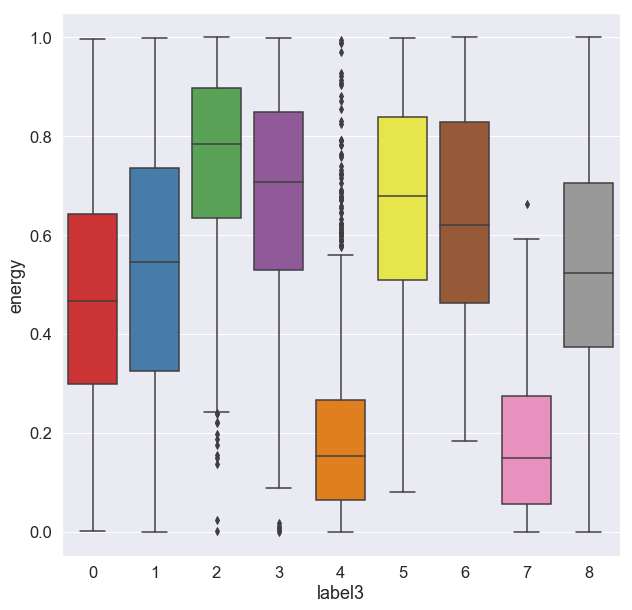

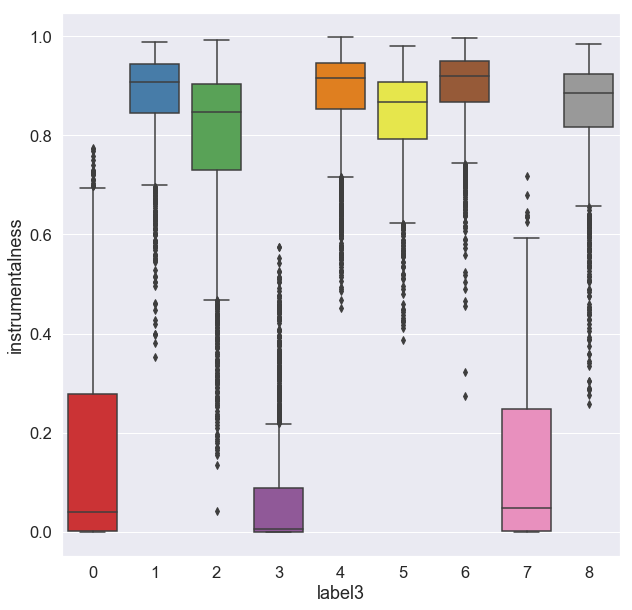

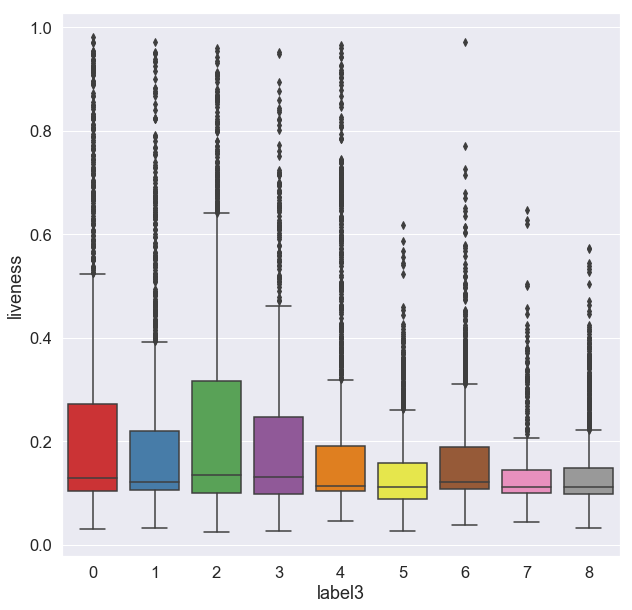

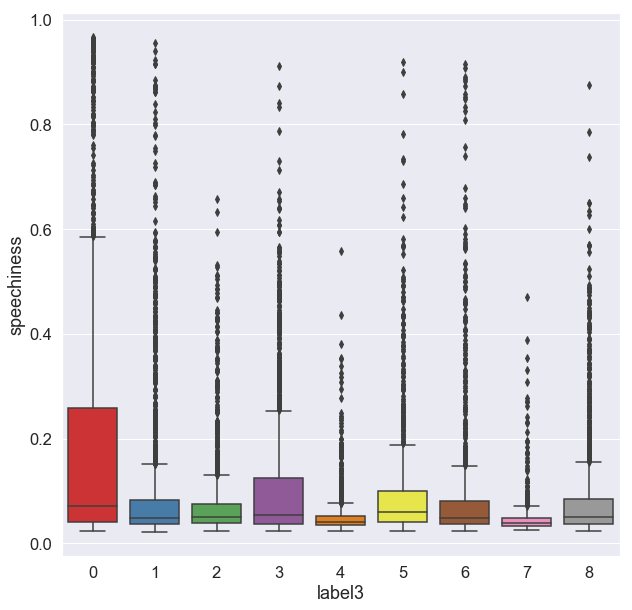

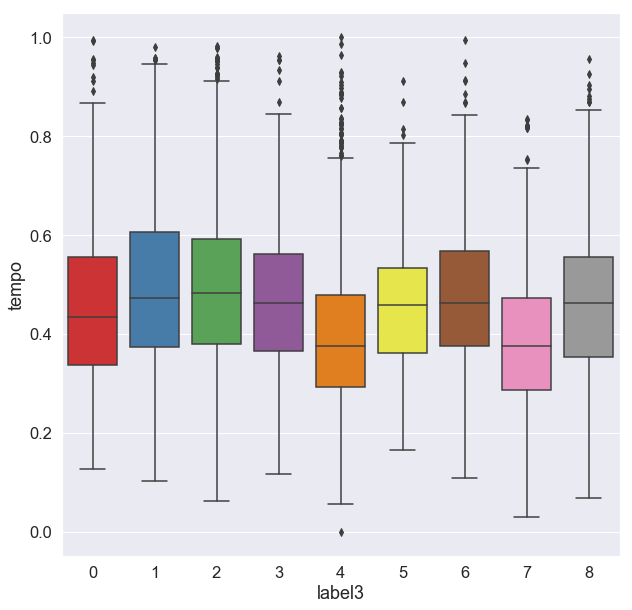

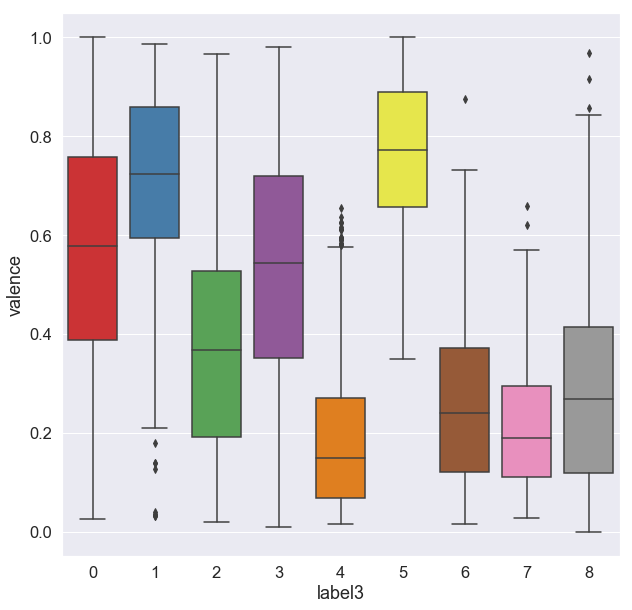

In [96]:
#boxplots for hierarchical clustering

plt.figure(figsize=(10,10))
sns.boxplot(x='label3', y='acousticness', data=tracks, palette='Set1')

plt.figure(figsize=(10,10))
sns.boxplot(x='label3', y='danceability', data=tracks, palette='Set1')

plt.figure(figsize=(10,10))
sns.boxplot(x='label3', y='energy', data=tracks, palette='Set1')

plt.figure(figsize=(10,10))
sns.boxplot(x='label3', y='instrumentalness', data=tracks, palette='Set1')

plt.figure(figsize=(10,10))
sns.boxplot(x='label3', y='liveness', data=tracks, palette='Set1')

plt.figure(figsize=(10,10))
sns.boxplot(x='label3', y='speechiness', data=tracks, palette='Set1')

plt.figure(figsize=(10,10))
sns.boxplot(x='label3', y='tempo', data=tracks, palette='Set1')

plt.figure(figsize=(10,10))
sns.boxplot(x='label3', y='valence', data=tracks, palette='Set1')

In [97]:
#implementing kNN Classification

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = features
y = tracks['KMeansLabel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("error rate")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

error rate
[[328   0   1   2   8   1   0   2   0]
 [  5 171   0   0   9   1   0   0   1]
 [  0   1 256   0   1   1   4   1  11]
 [  5   0   3 246   0   8   0   6   0]
 [ 10  10   3   0 193   0   1   1   0]
 [  2   0   0   8   0 241   0   6   2]
 [  0   0   4   0   2   0 311   6   4]
 [  3   0   1   8   1   6   9 332   0]
 [  0   0   5   0   0   3   3   0 379]]
                         precision    recall  f1-score   support

          Druggie songs       0.93      0.96      0.94       342
         Dull sad songs       0.94      0.91      0.93       187
 Enlighting happy songs       0.94      0.93      0.93       275
Lively empowering songs       0.93      0.92      0.92       268
Pleasant relaxing songs       0.90      0.89      0.89       218
 Upbeat danceable songs       0.92      0.93      0.93       259
   Uplifting calm songs       0.95      0.95      0.95       327
    exciting fast songs       0.94      0.92      0.93       360
          satanic songs       0.95      0.97      0